2d plot of dq vs dR

In [2]:
import os.path
import numpy as np
import matplotlib.pyplot as plt
import scipy
import refnx
from refnx.dataset import ReflectDataset, Data1D
from refnx.analysis import Transform, CurveFitter, Objective, Model, Parameter
from refnx.reflect import SLD, Slab, ReflectModel
print('refnx: %s\nscipy: %s\nnumpy: %s' % (refnx.version.version,
                   scipy.version.version, np.version.version))


refnx: 0.1.9
scipy: 1.3.0
numpy: 1.16.4


In [3]:
figI = 0
# simple structure
thicks_true = [10,120,100,130,10]
bs_true = [0,5,4.5,5,10]
roughs_true = [0,0,0,0,0]
# bs = [5,4.5,5]
# thicks = [120,100,130]
# roughs = [0,0,0]
bs = bs_true
thicks = thicks_true
roughs = roughs_true
loss = 1.
no_layers = len(bs)
no_layers = len(bs_true)
# no_layers = 3
layers = []
names = []
#names = ['layer1','layer2']
for i in range(no_layers):
    names.append('layer'+str(i))
for i in range(no_layers):
        sld = SLD(bs[i],name=names[i])
        layers.append(sld(thicks[i],roughs[i]))
structure = layers[0]
for layer in layers[1:]:
    structure|=layer
print("done")

done


<IPython.core.display.Javascript object>


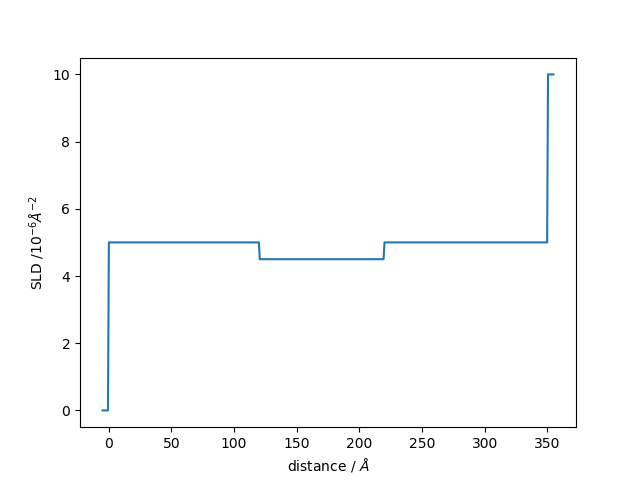

done


In [4]:
%matplotlib notebook
plt.figure(figI)
figI+=1
plt.plot(*structure.sld_profile())
plt.ylabel('SLD /$10^{-6} \AA^{-2}$')
plt.xlabel('distance / $\AA$');
print("done")

In [25]:
from seperat import seperateNLayer as snl
resolutions = [1.,3.,7.,9.]
dRScaleBys = [5,10,15,20]
lnPosts = []
lnPostss = []
figI=1
# resolution = 5.
for dRScaleBy in dRScaleBys:
#     datas=[]
    for resolution in resolutions:
        model = ReflectModel(structure, bkg=3e-6, dq=resolution)
        q = np.linspace(0.005, 0.3, 1001)
#         plt.figure(figI)
        figI+=1
        R = model(q, x_err=resolution)
#         plt.plot(q, R)
#         plt.xlabel('Q')
#         plt.ylabel('Reflectivity')
#         plt.yscale('log')
#         plt.title('dR scaled by '+str(dRScaleBy)+' dq '+str(resolution))
        #Q, R(Q), sig_Q, sig_R =
        import make_sim_data as msd
        sim_dR = msd.main(sim_q=q,sim_R=R)*10
#         R = model(q, x_err=resolution)
#         plt.errorbar(q,R,sim_dR, alpha=0.4)
        data = Data1D(data= (q,R,sim_dR))
        lnPost = snl(data,3)
        print(lnPost)
        lnPosts.append(lnPost)
#         datas.append(data)
#         print(data)
#     lnPostss.append(lnPosts)

csv
cvs-collecting
out  [3.47819830e+02 8.77904741e+01 3.20810699e+03 9.49732939e-37
 1.65307010e-05] 
var:  [[1.76447440e+01 1.39762075e+02 1.90993913e+00 2.55098590e+04
  6.99628049e-05]
 [1.39762075e+02 1.10704093e+03 1.51284720e+01 2.01610925e+05
  5.54070662e-04]
 [1.90993913e+00 1.51284720e+01 2.06742813e-01 2.73481708e+03
  7.56735044e-06]
 [2.55098590e+04 2.01610925e+05 2.73481708e+03 2.55670288e+08
  1.48331018e-01]
 [6.99628049e-05 5.54070662e-04 7.56735044e-06 1.48331018e-01
  2.92147690e-10]]
-224.8269656444011
csv
cvs-collecting
out  [3.47819830e+02 8.77904741e+01 3.20810699e+03 9.49732939e-37
 1.65307010e-05] 
var:  [[1.76447440e+01 1.39762075e+02 1.90993913e+00 2.55098590e+04
  6.99628049e-05]
 [1.39762075e+02 1.10704093e+03 1.51284720e+01 2.01610925e+05
  5.54070662e-04]
 [1.90993913e+00 1.51284720e+01 2.06742813e-01 2.73481708e+03
  7.56735044e-06]
 [2.55098590e+04 2.01610925e+05 2.73481708e+03 2.55670288e+08
  1.48331018e-01]
 [6.99628049e-05 5.54070662e-04 7.56735044

  2.92147690e-10]]
-359.0489961585083


In [5]:
# ins= []
# inss=[]
# first = 4
# second = 3
# third = 5
# for i in range(first):
#     ins=[]
#     for j in range(second,third):
# #         print("hi",i,j)
#         ins.append([i,j])
#     inss.append(ins)
# print(inss)

# for i in range(first):
#     for j in range(third-second):
#         print(inss[i][j])

In [26]:
print(len(lnPosts))

16


[-224.8269656444011, 933.353760130785, 1027.4314984717366, -346.83627507767676, -212.05837655341045, 933.4030410628999, 1027.431498820902, -346.8362749594579, -224.82696511477994, 991.2533100677164, 1027.431498788609, -359.04899429618604, -266.0615509177185, 991.2533104397437, 1027.43149881008, -359.0489961585083] 4 4


<IPython.core.display.Javascript object>


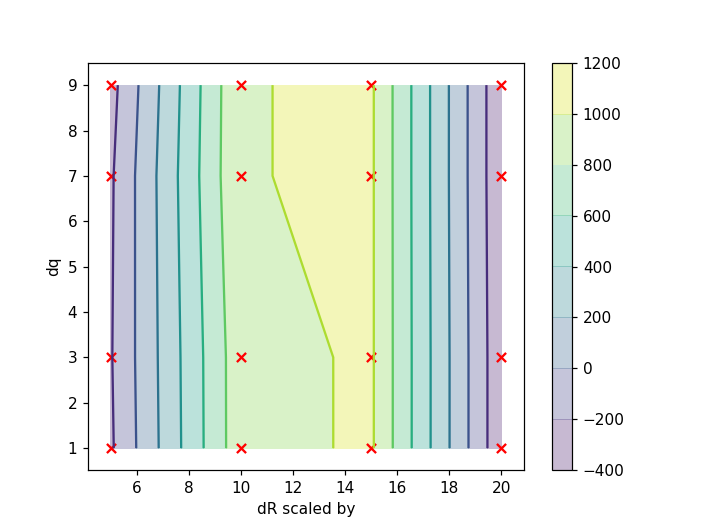

Text(0.5, 0, 'dR scaled by')

In [62]:
print(lnPosts,len(dRScaleBys),len(resolutions))
zs=[] #lnpost
zss=[]
xs=[] #dR scale
ys=[] #dq
lendR=len(dRScaleBys)
lenReso=len(resolutions)
for i in range(lendR):
    zs=[]
    for j in range(lenReso):
        z = lnPosts[lendR*i+j]
#         print(i,j,z,lendR*i+j)
        zs.append(z)
#         xs.append(i)
#         ys.append(j)
    zss.append(zs)
# print(zss,"\n",zss[0],"\n",zss[0][0])
# print(len(zss),len(xs),len(ys))
plt.figure(figI)
figI+=1
plt.contour(dRScaleBys,resolutions,zss)
plt.contourf(dRScaleBys,resolutions,zss,alpha=0.3)
plt.colorbar()
for x in dRScaleBys:
    for y in resolutions:
        plt.scatter(x,y,c="red",marker="x")
plt.ylabel("dq")
plt.xlabel("dR scaled by")
# plt.show()